In [33]:
%matplotlib inline
import lifelines as ll 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,10)
#plt.rcParams['axes.unicode_minus'] = False #用来正常显示符号

In [24]:
from lifelines.datasets import load_dd
data = load_dd()

For this estimation, we need the duration each leader was/has been in office, and whether or not they were observed to have left office 

In [25]:
#KaplanMeierFitter fit model to data

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

T = data["duration"] #时间长度
E = data["observed"] #是否截断 1:观察到样本终极状态

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

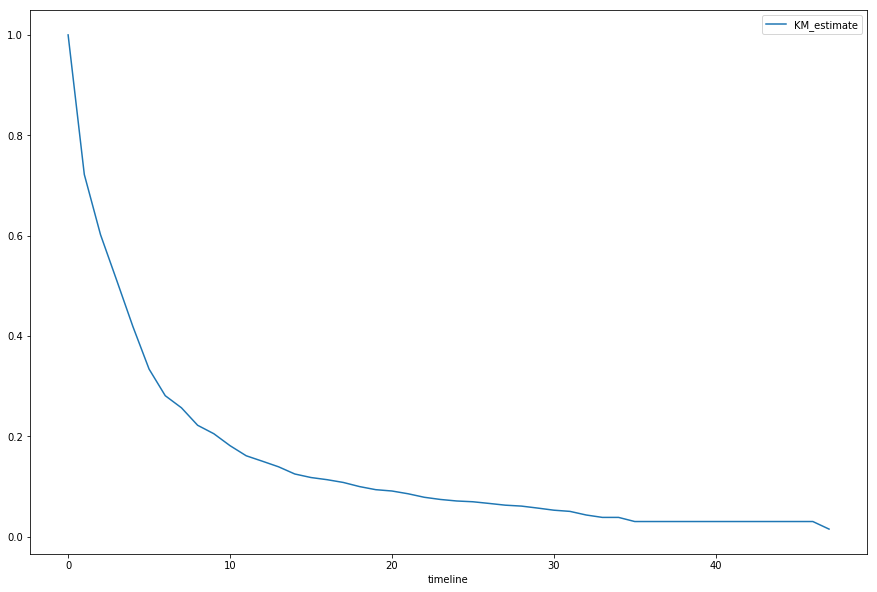

In [26]:
#Kaplan_Meier曲线刻画生存函数
kmf.survival_function_.plot()

- The y-axis represents the probability a leader is still around after t years, where t years is on the x-axis. We see that very few leaders make it past 20 years in office. Of course, like all good stats, we need to report how uncertain we are about these point estimates, i.e., we need confidence intervals. They are computed in the call to fit, and located under the confidence_interval_ property. 

Alternatively, we can call plot on the KaplanMeierFitter itself to plot both the KM estimate and its confidence intervals:

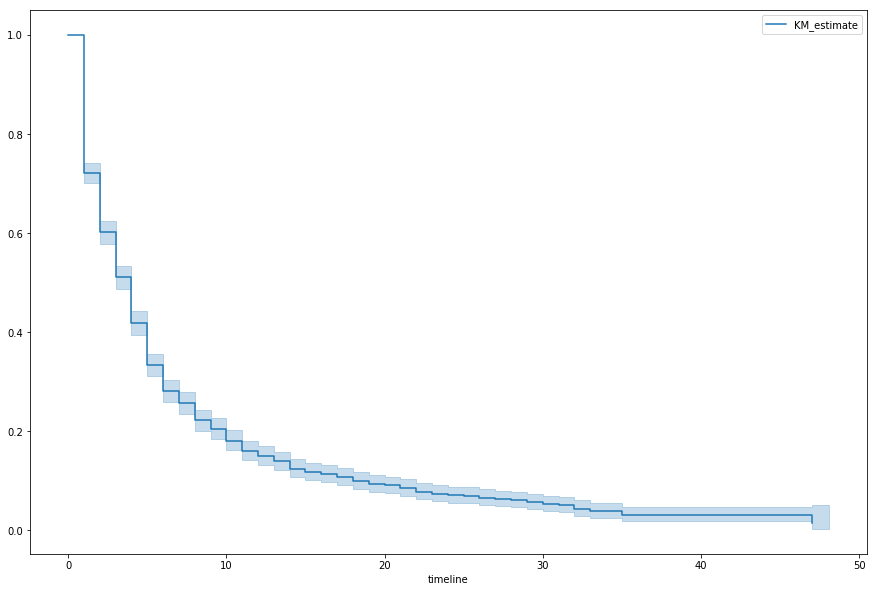

In [27]:
kmf.plot()

In [28]:
#中位数
kmf.median_

4.0

Interesting that it is only three years. That means, around the world, elected leaders have a 50% chance of cessation in three years!

segment on democratic regimes vs non-democratic regimes. 
Calling plot on either the estimate itself or the fitter object will return an axis object, that can be used for plotting further estimates:

In [29]:
data 

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0
5,Afghanistan,700,700.0,Southern Asia,Asia,Babrak Karmal,Babrak Karmal.Afghanistan.1979.1984.Civilian Dict,Non-democracy,Civilian Dict,1979,6,1
6,Afghanistan,700,700.0,Southern Asia,Asia,Mohammed Najibullah,Mohammed Najibullah.Afghanistan.1985.1991.Civi...,Non-democracy,Civilian Dict,1985,7,1
7,Afghanistan,700,700.0,Southern Asia,Asia,Burhanuddin Rabbani,Burhanuddin Rabbani.Afghanistan.1992.1995.Civi...,Non-democracy,Civilian Dict,1992,4,1
8,Afghanistan,700,700.0,Southern Asia,Asia,Mullah Mohammad Rabbani,Mullah Mohammad Rabbani.Afghanistan.1996.2000....,Non-democracy,Civilian Dict,1996,5,0
9,Afghanistan,700,700.0,Southern Asia,Asia,Hamid Karzai,Hamid Karzai.Afghanistan.2001.2008.Civilian Dict,Non-democracy,Civilian Dict,2001,8,0


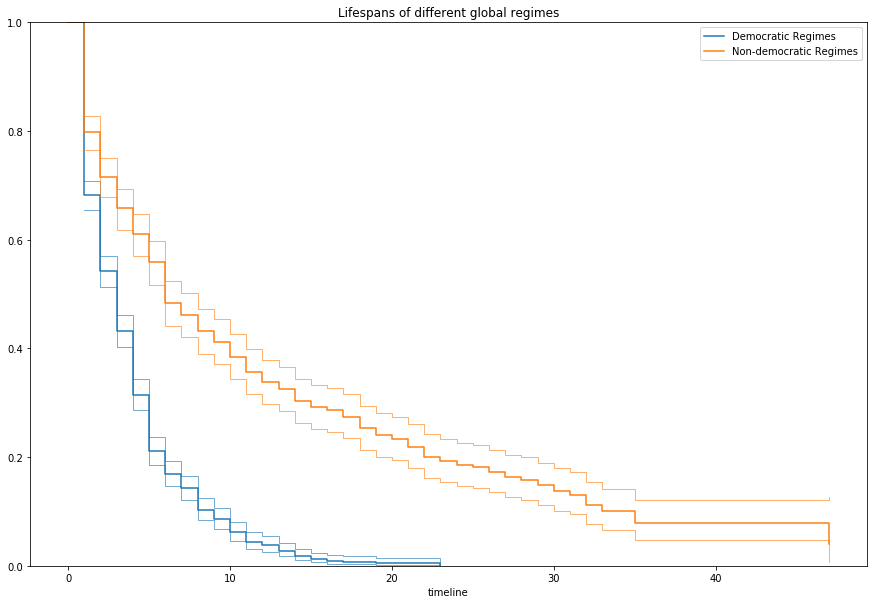

In [30]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines = True)
kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines = True)

plt.ylim(0,1);
plt.title("Lifespans of different global regimes");

specify the  times we are interested and  are returned a DataFrame with a probabilities of survial at those points

Median survival time of democratic: 3.0
Median survival time of non_democratic: 6.0


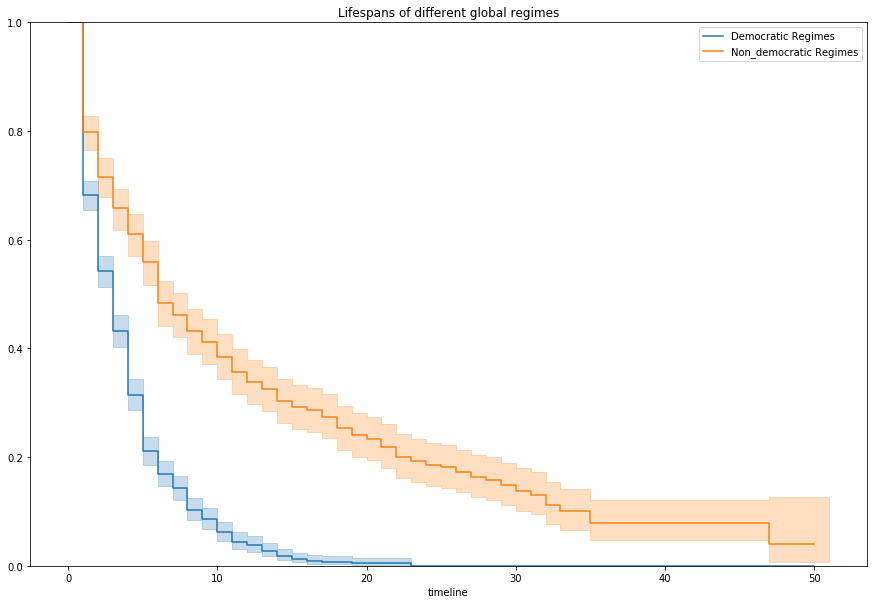

In [36]:
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of democratic:", kmf.median_)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non_democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of non_democratic:", kmf.median_)

plt.ylim(0,1)
plt.title("Lifespans of different global regimes");

#### statistical test

Here the difference between survival functions is very obvious, and performing a statistical test seems pedantic. If the curves are more similar, or we possess less data, we may be interested in performing a statistical test. In this case, lifelines contains routines in lifelines.statistics to compare two survival curves. Below we demonstrate this routine. The function <font color = 'blue'> **logrank_test** <font color = 'black'> is a common statistical test in survival analysis that compares two event series’ generators. If the value returned exceeds some pre-specified value, then we rule that the series have different generators.

In [37]:
from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
             alpha = 0.99
 null_distribution = chi squared
degrees_of_freedom = 1

---
test_statistic      p  log(p)     
        260.47 <0.005 -133.25  ***
---
Signif. codes: 0 '***' 0.0001 '**' 0.001 '*' 0.01 '.' 0.05 ' ' 1


p 小于0.005，两组显著不同

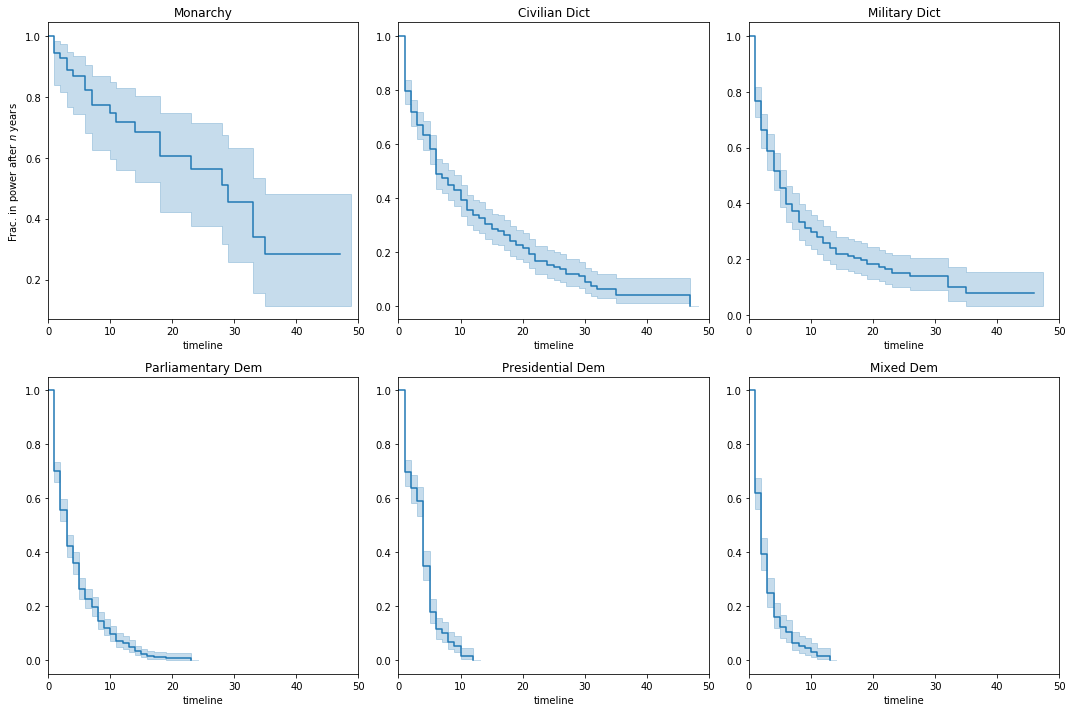

In [39]:
#compare the different types of regimes present in the dataset:

regime_types = data['regime'].unique()

for i,regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i+1)
    ix = data['regime'] == regime_type
    kmf.fit( T[ix], E[ix], label=regime_type)
    kmf.plot(ax=ax, legend=False)
    plt.title(regime_type)
    plt.xlim(0, 50)
    if i==0:
        plt.ylabel('Frac. in power after $n$ years')
plt.tight_layout()